In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
  '/Users/jiseungmin/Desktop/chunnamAIcontest/dataset',
  target_size=(300, 300),
  batch_size=128,
  shuffle=True,
  class_mode='binary',
  subset='training'
)

validation_generator = train_datagen.flow_from_directory(
  '/Users/jiseungmin/Desktop/chunnamAIcontest/dataset/',
  target_size=(300, 300),
  batch_size=128,
  shuffle=True,
  class_mode='binary',
  subset='validation',
)


Found 3024 images belonging to 2 classes.
Found 335 images belonging to 2 classes.


In [3]:
model = tf.keras.models.Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    # Flatten
    tf.keras.layers.Flatten(),
    # 512 Neuron (Hidden layer)
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # 1 Output neuron
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 149, 149, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                             

2022-12-16 17:59:34.056874: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-16 17:59:34.057027: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.001),
            metrics=['accuracy'])

/Users/jiseungmin/miniforge3/envs/tf/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [5]:
train_generator.class_indices

{'bad': 0, 'pass': 1}

In [6]:
history = model.fit(
  train_generator,
  steps_per_epoch=8,
  validation_data=validation_generator,
  epochs=50,
  verbose=1,
  shuffle=True
)

Epoch 1/50


2022-12-16 17:59:34.441944: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-16 17:59:34.877613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 0.2168 - accuracy: 0.9365

2022-12-16 17:59:42.374858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 9s 987ms/step - loss: 0.2168 - accuracy: 0.9365 - val_loss: 0.4759 - val_accuracy: 1.0000
Epoch 2/50
8/8 [==============================] - 7s 907ms/step - loss: 0.0681 - accuracy: 0.9764 - val_loss: 0.3644 - val_accuracy: 1.0000
Epoch 3/50
8/8 [==============================] - 7s 940ms/step - loss: 0.0474 - accuracy: 0.9857 - val_loss: 0.4677 - val_accuracy: 1.0000
Epoch 4/50
8/8 [==============================] - 7s 912ms/step - loss: 0.0356 - accuracy: 0.9854 - val_loss: 0.4338 - val_accuracy: 1.0000
Epoch 5/50
8/8 [==============================] - 7s 938ms/step - loss: 0.0266 - accuracy: 0.9928 - val_loss: 0.3146 - val_accuracy: 1.0000
Epoch 6/50
8/8 [==============================] - 7s 903ms/step - loss: 0.0277 - accuracy: 0.9898 - val_loss: 0.2357 - val_accuracy: 0.9313
Epoch 7/50
8/8 [==============================] - 7s 908ms/step - loss: 0.0446 - accuracy: 0.9857 - val_loss: 0.2905 - val_accuracy: 0.9731
Epoch 8/50
8/8 [===============

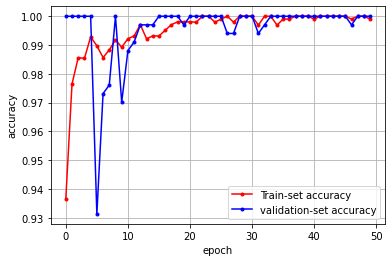

In [7]:
y_Train = history.history['accuracy']
y_validation = history.history['val_accuracy']

x_len = np.arange(len(y_validation))
plt.plot(x_len, y_Train, marker='.', c='red', label="Train-set accuracy")
plt.plot(x_len, y_validation, marker='.', c='blue', label="validation-set accuracy")


plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

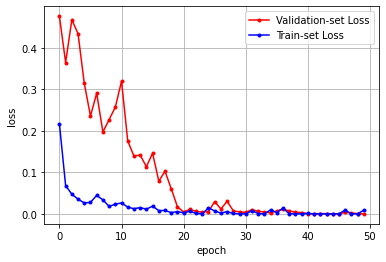

In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model.evaluate(train_generator)

In [ ]:
import shutil
from tensorflow.keras.preprocessing import image

Testfolder_path = "/Users/jiseungmin/Desktop/chunnamAIcontest/test_data/"
file_list = os.listdir(Testfolder_path)
Currentpath = os.getcwd()

f = open("불량검사.txt","wt") 
for file in file_list :
    img=image.load_img(Testfolder_path+file, target_size=(300, 300))

    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)
  
    if classes[0]>0:
        print()
        if not os.path.exists(Currentpath+"/pass"):
             os.makedirs(Currentpath+"/pass")
        shutil.move(Testfolder_path+file, Currentpath+"/pass")
        f.write(file + " ----- pass\n")
    else:
        print()
        if not os.path.exists(Currentpath+"/bad"):
             os.makedirs(Currentpath+"/bad")
        shutil.move(Testfolder_path+file, Currentpath+"/bad")
        f.write(file + " ----- bad\n")

f.close()

In [ ]:
model.save('livet_badgood_class_cnn.h5')